<a href="https://colab.research.google.com/github/otoperalias/Coyuntura/blob/main/clases/Tema2_ExplorandoPWT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tema 2

## Explorando la Penn World Table

La Penn World Table es una base de datos macroeconómica con información sobre niveles de renta, productividad, etc. de cerca de 180 países desde 1950.

  * Accesible aquí: [Penn World Table](https://www.rug.nl/ggdc/productivity/pwt/?lang=en)

### 1. Importación de la base de datos y breve exploración

In [1]:
# Importamos librerias y establecemos algunas opciones
import pandas as pd
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 30)
import matplotlib.pyplot as plt


In [ ]:
# Importar datos
link="https://www.rug.nl/ggdc/docs/pwt100.xlsx"
pwt=pd.read_excel(link,"Data") # Es una base de datos grande
pwt

In [ ]:
# Vemos las columnas que tiene
pwt.columns

In [ ]:
# Comprobamos los países que incluye
pwt['country'].unique()

In [ ]:
# Lo anterior lo podemos hacer también a través de un bucle
for a in pwt['country'].unique():
    print(a)

In [7]:
# Número de países
len(pwt['country'].unique())

183

In [ ]:
# Los años
pwt['year'].unique()

In [ ]:
# El número de observaciones (filas en la tabla) por año
pwt['year'].value_counts() # ¡La función value_counts() es muy útil!

In [10]:
# Dimensiones de la base de datos:
print(pwt.shape) # filas x columnas

(12810, 52)


### 2. Ejercicio
1. Crear una tabla con los datos de España y su población (observar que pop es la columna con los datos de población).
2. Representar gráficamente la evolución de la población en España.
3. Calcular la tasa de variación anual de la población en España y representarlo gráficamente.
4.  Hacer lo mismo que en los tres puntos anteriores pero con Italia.
5. Calcular la media del crecimiento de la población en España e Italia, es decir, calcular la media de la tasa de variación anual durante todo el periodo (1950-2017).  Pista: usar la función ```.mean```
6. Representar gráficamente la evolución de la población en ambos países. Hacer lo mismo con sus tasas de variación.
7. Por otra parte, en relación al crecimiento del PIB, ¿qué país ha crecido más? Usar la variable “rgdpo” (ver la hoja “Legend” del archivo Excel). Representar también gráficamente el crecimiento del PIB de ambos países durante el periodo 1950-2017.

In [ ]:
# 1. Tabla con los datos de España y su población
spain=pwt.query("country=='Spain'")
spain_pop=spain[['year','pop']]
spain_pop.set_index("year", inplace=True)
spain_pop

In [ ]:
# 2 Representar gráficamente la evolución de la población en España.
spain_pop.plot(title="Evolución de la población en España")

In [ ]:
# 3 Calcular la tasa de variación anual de la población en España y representarlo gráficamente.
#spain_pop_tv=spain_pop.diff()/spain_pop.shift()
spain_pop_tv=spain_pop/spain_pop.shift()-1
spain_pop_tv.plot()

In [22]:
# 4. Creamos tablas para Italia
italy=pwt.query("country=='Italy'")
italy_pop=italy[['year','pop']]
italy_pop.set_index("year", inplace=True)
italy_pop_tv=italy_pop.diff()/italy_pop.shift()

In [ ]:
# Evolución de la población en Italia
italy_pop.plot(title="Evolución de la población en Italia")

In [ ]:
# Tasa de variación de la población en Italia
italy_pop_tv.plot(title="Crecimiento de la población en Italia")

In [ ]:
# 5. Calcular la media del crecimiento de la población en España e Italia
pop_sp_it_tv=spain_pop_tv.merge(italy_pop_tv, on='year')
pop_sp_it_tv.rename(columns={"pop_x":"Spain","pop_y":"Italy"}, inplace=True)
medias_tot=pop_sp_it_tv.mean()
medias_tot.plot.bar()

In [ ]:
# 6. Representar gráficamente la evolución de la población en ambos países
fig,ax=plt.subplots()
ax.plot(spain_pop, label="España")
ax.plot(italy_pop, label="Italia")
ax.legend()
plt.show()

In [ ]:
# Ahora, las tasas de variación
fig,ax=plt.subplots()
ax.plot(spain_pop_tv, label="Spain")
ax.plot(italy_pop_tv, label="Italia")
ax.legend()
plt.show()

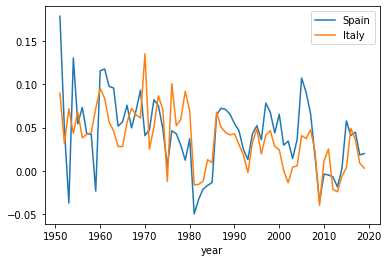

In [ ]:
# 7. ¿Qué país ha crecido más en términos de PIB (rgdpo)?
# Representar gráficamente el crecimiento del PIB de ambos países durante el periodo 1950-2017.
spain_pib=spain[['year','rgdpo']]
spain_pib.set_index("year", inplace=True)
italy_pib=italy[['year','rgdpo']]
italy_pib.set_index("year", inplace=True)
pib=spain_pib.merge(italy_pib, on="year")
pib.rename(columns={"rgdpo_x":"Spain","rgdpo_y":"Italy"}, inplace=True)
pib_tv=pib.diff().div(pib.shift())
pib_tv.plot()

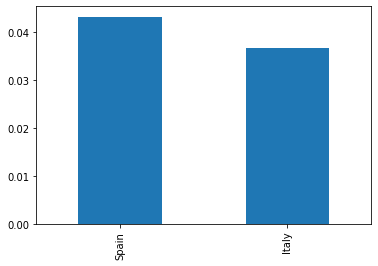

In [ ]:
#¿Qué país ha crecido más?
pib_tv.mean().plot.bar()

### Ejercicios adicionales:

1. Analizar para UK, Alemania, Francia, Italia, España y Portugal cómo ha evolucionado el human capital index ("hc"), el número medio de horas trabajadas ("avh") y el peso del gasto público en el PIB ("csh_g"). 
Realizar el análisis simplemente a través de la representación gráfica de las series de datos.

2. Crear una función que devuelve el valor medio de un indicador de la tabla Penn World Table para un país determinado y un periodo determinado. Se trata de una función que debe tomar cuatro argumentos: 1) la variable macroeconómica, 2) el país, 3) el año inicial del periodo, 4) el año final del periodo. Como pista, la función puede tener esta estructura:

```python
def valor_medio(indicador, pais, añoinicial, añofinal):
  '''
 Calcula el valor medio de un indicador para un país y periodo concreto. Se da por hecho que la tabla a consultar se denomina pwt
  '''
  consulta=pwt[pwt.country==pais] # Selecciona el país 
  consulta=...                    # Selecciona el periodo
  vmedio= ... # Calcula el valor medio
  return vmedio
```